In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

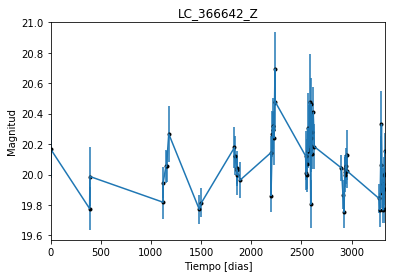

In [2]:
data = np.genfromtxt('LC_366642_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_366642_Z')
plt.savefig("LC_366642_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

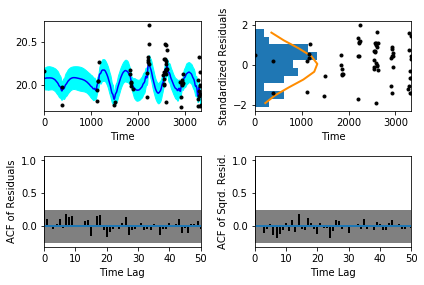

In [5]:
sample.assess_fit()

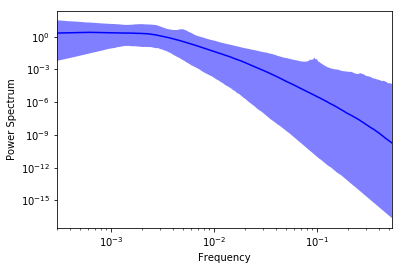

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

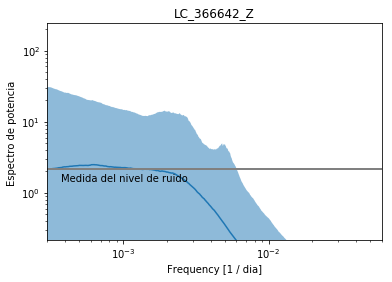

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_366642_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_366642_Z')

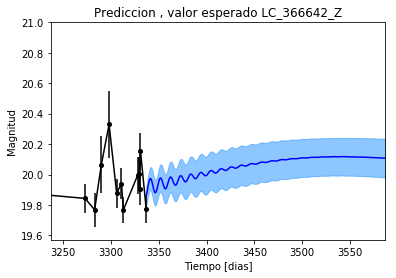

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_366642_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_366642_Z')

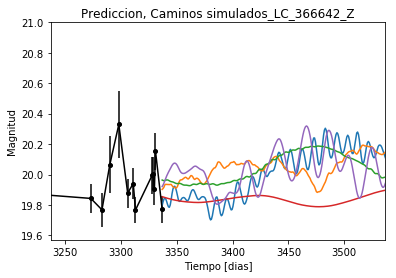

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_366642_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


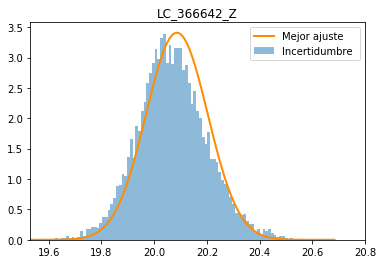

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_366642_Z')
plt.savefig("Mejor_ajuste_LC_366642_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_366642_Z')

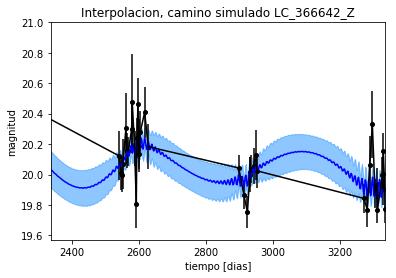

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_366642_Z')

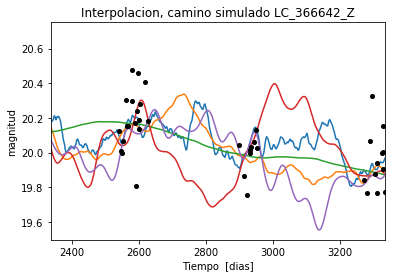

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 730.062233724
Median: 0.0059859249844
Standard deviation: 0.163396286933
68% credibility interval: [ 0.0006928   0.08946205]
95% credibility interval: [  3.43353135e-04   6.42064131e-01]
99% credibility interval: [  3.06454494e-04   9.81430931e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 536.460802093
Median: 0.0028958168155
Standard deviation: 0.0975019361788
68% credibility interval: [ 0.00057728  0.03394177]
95% credibility interval: [ 0.00033191  0.3283832 ]
99% credibility interval: [  3.04739130e-04   6.83941501e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1163.75917995
Median: 0.0113004500253
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1426.74505399
Median: 57.7352500899
Standard deviation: 1.64535674565
68% credibility interval: [ 55.95615947  58.92754177]
95% credibility interval: [ 53.44566505  59.99626739]
99% credibility interval: [ 51.69584889  60.39885566]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 593.350746691
Median: 0.500959470129
Standard deviation: 2.15743701416
68% credibility interval: [ 0.05510242  3.69280329]
95% credibility interval: [ 0.01573403  7.09302583]
99% credibility interval: [  1.07399960e-02   1.13791037e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 783.647712872
Median: 0.409373030149
Standard deviation: 9.98221562246
68% credibility interval: [ 0.01378321  8.99755382]
95% credibility interval: [  8.4

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 28332.9130974
Median: 1.78981978758e-13
Standard deviation: 5.50708693521e+113
68% credibility interval: [  3.34064863e-62   2.14760961e+40]
95% credibility interval: [  5.64550426e-87   1.39079559e+86]
99% credibility interval: [  1.48550653e-101   2.70977361e+102]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2133.62251329
Median: 20.0174239876
Standard deviation: 0.0612814966534
68% credibility interval: [ 19.96417877  20.06933918]
95% credibility interval: [ 19.89061023  20.13719485]
99% credibility interval: [ 19.8125835   20.19789833]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 479.770581322
Median: 0.0271915441649
Standard deviation: 0.258026179151
68% credibility interval: [ 0.          0.39439176]
95% credibility interval: [ 0.          0.92694628]
99% credibility interval: [ 0.          1.03946205]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 479.770581322
Median: 0.0271915441649
Standard deviation: 0.258026179151
68% credibility interval: [ 0.          0.39439176]
95% credibility interval: [ 0.          0.92694628]
99% credibility interval: [ 0.          1.03946205]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 740.37037715
Median: 0.0
Standard deviation: 0.00148567849254
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1426.74505399
Median: 57.7352500899
Standard deviation: 1.64535674565
68% credibility interval: [ 55.95615947  58.92754177]
95% credibility interval: [ 53.44566505  59.99626739]
99% credibility interval: [ 51.69584889  60.39885566]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2344.96925321
Median: 0.0240454234713
Standard deviation: 0.0244066891064
68% credibility interval: [ 0.01289508  0.04393172]
95% credibility interval: [ 0.00699627  0.0877538 ]
99% credibility interval: [ 0.00470025  0.1502646 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2369.81404335
Median: 1.02713490008
Standard deviation: 0.165074245239
68% credibility interval: [ 0.88017582  1.19985306]
95% credibility interval: [ 0.75714146  1.40422486]
99% credibility interval: [ 0.68635756  1.54900638]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1177.9585489
Median: 4.23401261348e-05
Standard deviation: 0.249341073528
68% credibility interval: [  8.95501020e-44   7.83417058e-03]
95% credibility interval: [  1.00778779e-88   2.91748176e-01]
99% credibility interval: [  1.59930547e-106   2.70749610e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 730.062233724
Median: (-0.0376106759119-2.06120943193j)
Standard deviation: 1.9189536691
68% credibility interval: [-0.56210666+0.j         -0.00435298-0.04997016j]
95% credibility interval: [ -4.03420792e+00+0.j          -2.15735137e-03-0.03455742j]
99% credibility interval: [ -6.16651241e+00-0.01748286j  -1.92551037e-03-0.0340116j ]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 536.460802093
Median: (-0.0181949536674+0.536496686579j)
Standard deviation: 1.73311318763
68% credibility interval: [-0.21326245+1.22649799j -0.00362715+0.04087245j]
95% credibility interval: [-2.06329251+2.46299484j -0.00208546+0.j        ]
99% credibility interval: [ -4.29733119e+00+2.44431319j  -1.91473243e-03+1.10497331j]
Posterior summ